<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
# (Eğer ortamda yoksa kurulum)
!pip install pandas numpy matplotlib seaborn

# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiklerin not defteri içinde görünmesi için
%matplotlib inline

# Uyarıları temiz tutmak için
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully! ✅")

Libraries imported successfully! ✅


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:


# URL'den veri setini yükle
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
df = pd.read_csv(url)

# İlk 5 satırı göster
print("✅ Dataset loaded successfully!")
df.head()


✅ Dataset loaded successfully!


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
# Kritik sütunlar
critical_cols = ['Employment', 'JobSat', 'WorkRemote']

# Eksik değerleri kontrol et
missing_critical = df[critical_cols].isnull().sum()
print(missing_critical)
# JobSat için mode ile doldurma
df['JobSat'].fillna(df['JobSat'].mode()[0], inplace=True)

# WorkRemote için 'Unknown' ile doldurma
df['WorkRemote'].fillna('Unknown', inplace=True)

# Eksik değerleri tekrar kontrol et
print(df[['Employment', 'JobSat', 'WorkRemote']].isnull().sum())


Employment    0
JobSat        1
WorkRemote    8
dtype: int64
Employment    0
JobSat        0
WorkRemote    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


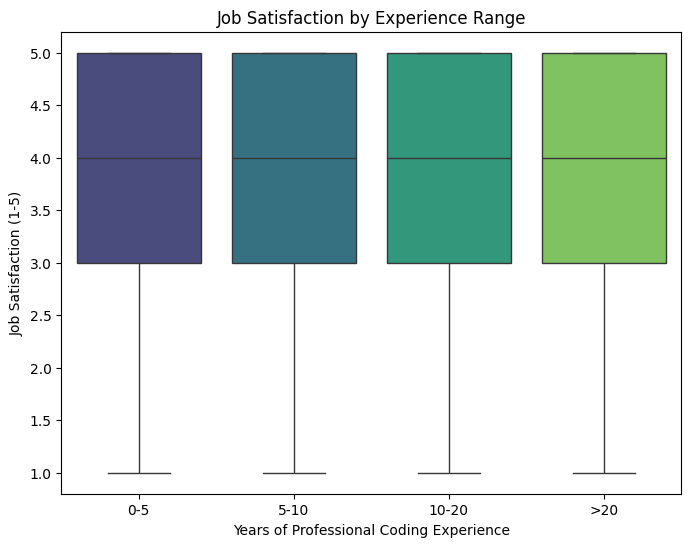

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# YearsCodePro'yu sayısal değere çeviriyoruz
def convert_years(x):
    try:
        return float(x)
    except:
        if x == "Less than 1 year":
            return 0.5
        elif x == "More than 50 years":
            return 51
        else:
            return None

df['YearsCodeProNum'] = df['YearsCodePro'].apply(convert_years)

# ExperienceRange sütunu oluştur
bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodeProNum'], bins=bins, labels=labels)

# Boxplot ile görselleştir
plt.figure(figsize=(8,6))
sns.boxplot(x='ExperienceRange', y='JobSatNum', data=df, palette='viridis')
plt.title('Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (1-5)')
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


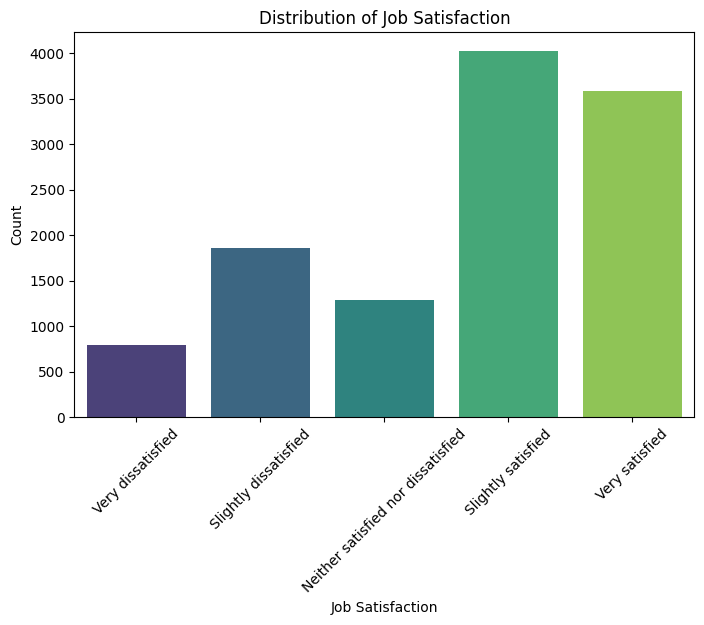

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='JobSat', order=['Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Very satisfied'], palette='viridis')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


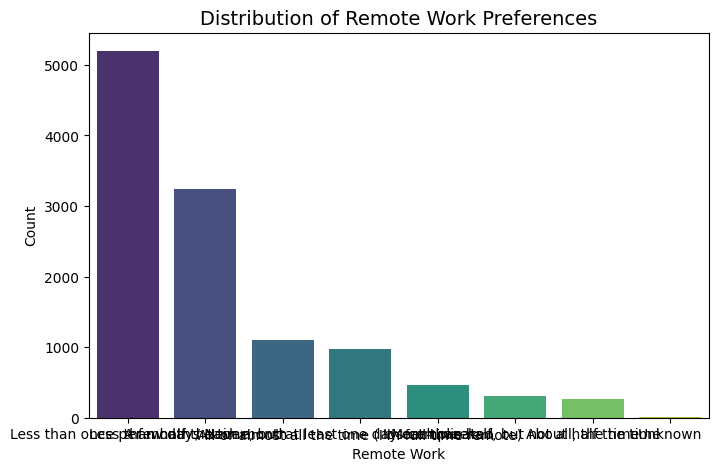

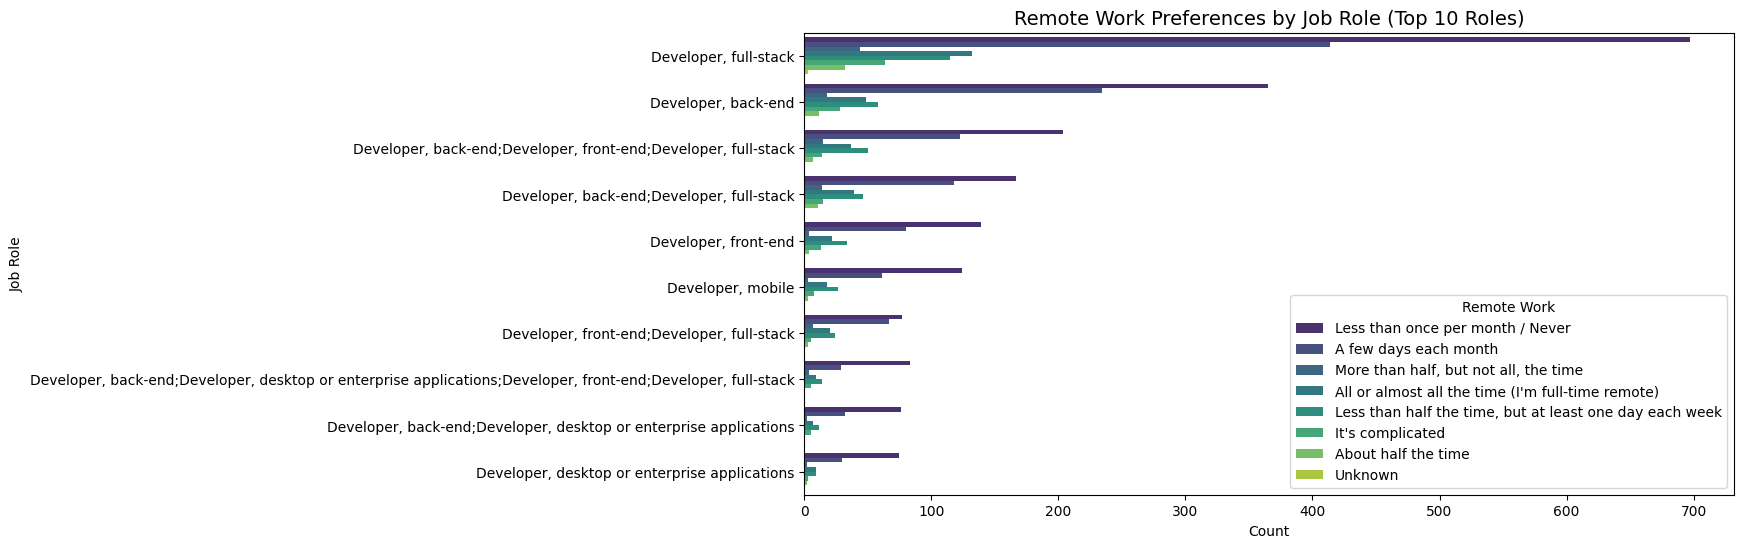

In [16]:
# RemoteWork sütunundaki eksikleri "Unknown" ile dolduralım
df['WorkRemote'] = df['WorkRemote'].fillna('Unknown')

# 1. Remote work dağılımını görselleştirme
plt.figure(figsize=(8,5))
sns.countplot(x='WorkRemote', data=df, order=df['WorkRemote'].value_counts().index, palette='viridis')
plt.title('Distribution of Remote Work Preferences', fontsize=14)
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

# 3. Remote work tercihini DevType/job role ile inceleme (sadece ilk 10 popüler role)
top_roles = df['DevType'].value_counts().head(10).index
df_top_roles = df[df['DevType'].isin(top_roles)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_roles, y='DevType', hue='WorkRemote', order=top_roles, palette='viridis')
plt.title('Remote Work Preferences by Job Role (Top 10 Roles)', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.legend(title='Remote Work')
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


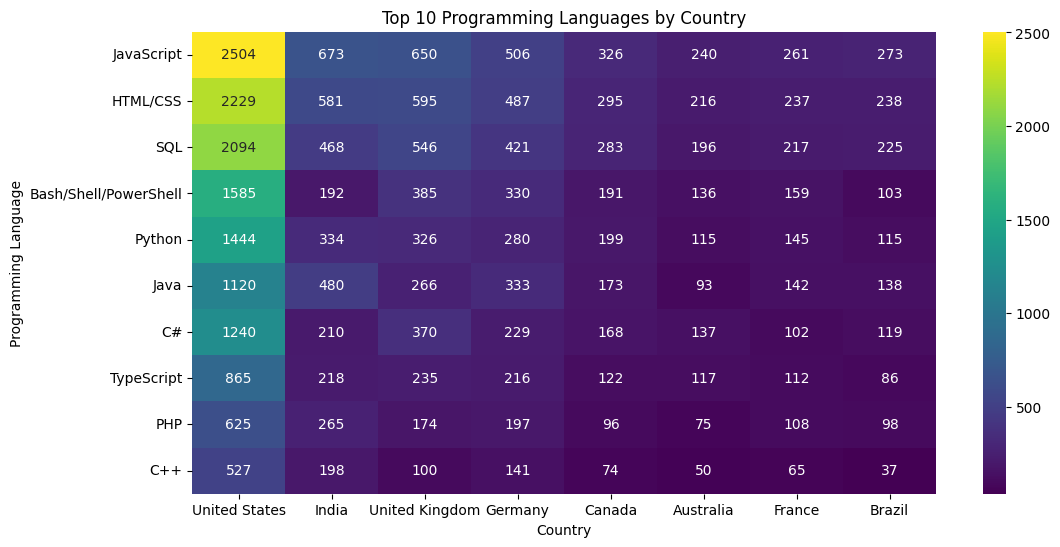

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gösterilecek ülkeler
countries = ['United States', 'India', 'United Kingdom', 'Germany', 'Canada', 'Australia', 'France', 'Brazil']

# Sadece seçilen ülkeleri filtrele
df_countries = df[df['Country'].isin(countries)]

# Her ülke için dillerin sayısını hesapla
language_counts = {}

for country in countries:
    langs = df_countries[df_countries['Country'] == country]['LanguageWorkedWith'].dropna()
    all_langs = []
    for item in langs:
        all_langs.extend(item.split(';'))
    lang_series = pd.Series(all_langs).value_counts()
    language_counts[country] = lang_series

# DataFrame haline getir ve eksik değerleri 0 ile doldur
lang_df = pd.DataFrame(language_counts).fillna(0)

# En popüler 10 dili seç
top_langs = lang_df.sum(axis=1).sort_values(ascending=False).head(10).index
lang_df_top = lang_df.loc[top_langs]

# Heatmap görselleştirme
plt.figure(figsize=(12,6))
sns.heatmap(lang_df_top, annot=True, fmt='g', cmap='viridis')
plt.title("Top 10 Programming Languages by Country")
plt.xlabel("Country")
plt.ylabel("Programming Language")
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


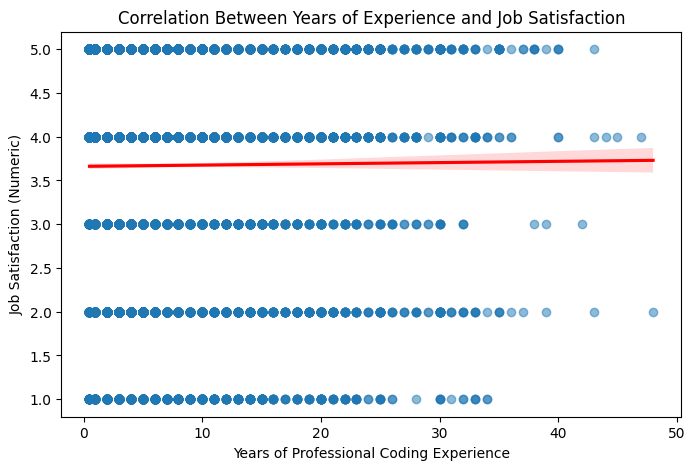

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eksik değerleri çıkar
df_corr = df[['YearsCodeProNum', 'JobSatNum']].dropna()

plt.figure(figsize=(8,5))
sns.regplot(data=df_corr, x='YearsCodeProNum', y='JobSatNum', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Correlation Between Years of Experience and Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction (Numeric)")
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


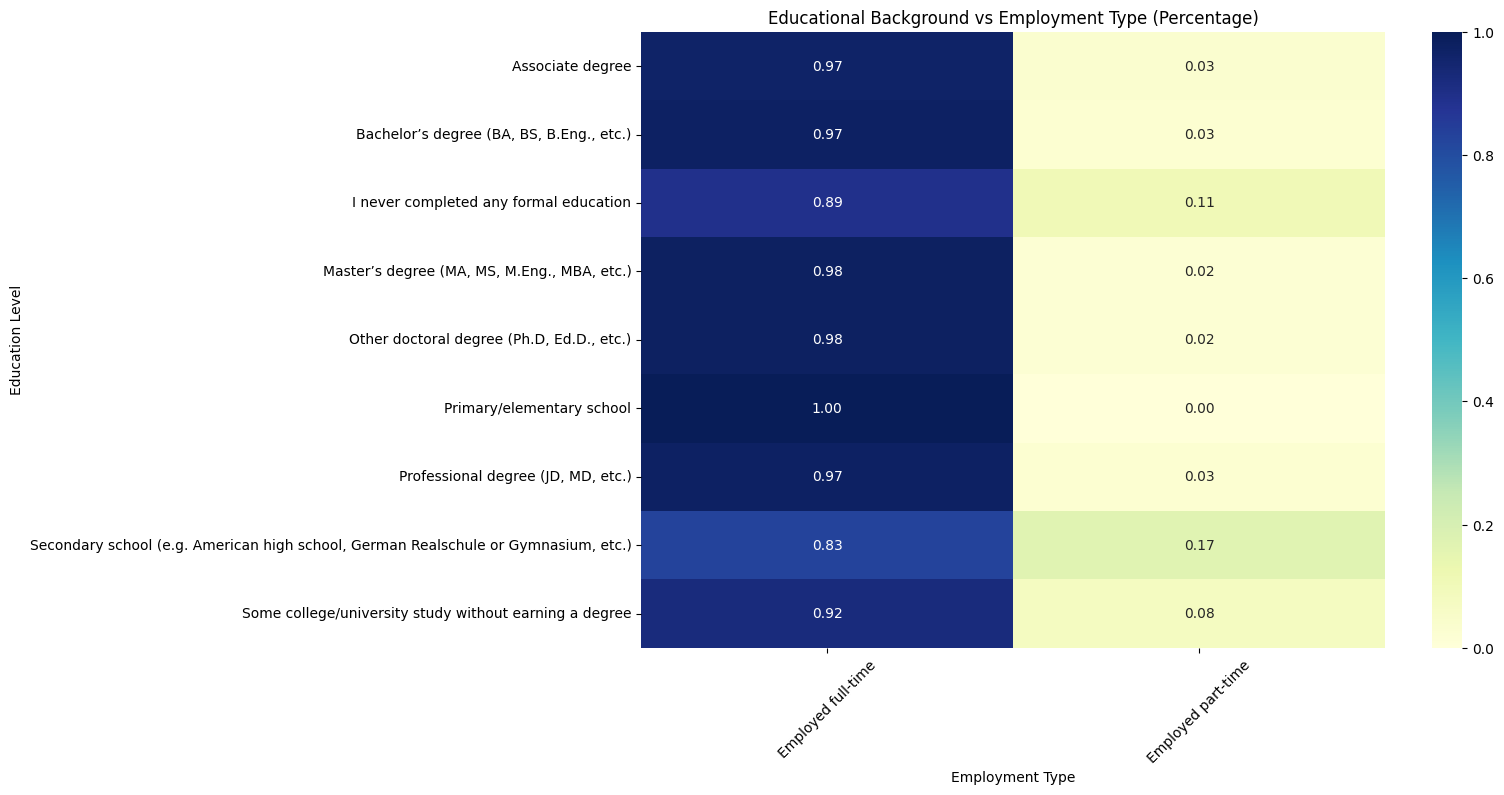

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-tab oluştur
edu_emp_ct = pd.crosstab(df['EdLevel'], df['Employment'])

# Cross-tabı yüzdelik olarak normalize edebiliriz
edu_emp_pct = edu_emp_ct.div(edu_emp_ct.sum(axis=1), axis=0)

# Heatmap ile görselleştirme
plt.figure(figsize=(12,8))
sns.heatmap(edu_emp_pct, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Educational Background vs Employment Type (Percentage)")
plt.xlabel("Employment Type")
plt.ylabel("Education Level")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
# Step 10: Save the Cleaned and Analyzed Dataset

# Örneğin df_ed kullanabiliriz ya da tüm df'i kaydedebiliriz
# Burada tüm dataset'i kaydediyoruz
output_file = "cleaned_survey_data.csv"

df.to_csv(output_file, index=False)
print(f"✅ Dataset saved successfully as '{output_file}'")

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
